In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test)  = fashion_mnist.load_data()

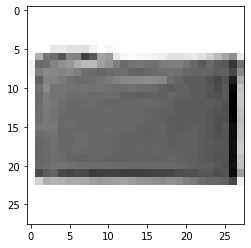

In [3]:
plt.imshow(x_train[1234], cmap = 'Greys')

In [4]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
from keras.utils import to_categorical

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from keras.optimizers import SGD, Adam

In [9]:
model = Sequential()

In [10]:
# 1st Conv Layer

In [11]:
model.add(Conv2D(8, (3,3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(8, (3,3), padding = 'same', activation = 'relu'))

In [12]:
model.add(MaxPool2D(pool_size = (2,2)))

In [13]:
# 2nd Conv Layer

In [14]:
model.add(Conv2D(16, (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(16, (3,3), padding = 'same', activation = 'relu'))

In [15]:
model.add(MaxPool2D(pool_size = (2,2)))

In [16]:
# 3rd Conv Layer

In [17]:
model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu'))

In [18]:
model.add(MaxPool2D(pool_size = (2,2)))

In [19]:
#Flatten

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [22]:
model.compile(loss="logcosh", optimizer=Adam(lr = 0.001),
              metrics=['accuracy'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 32)          4640      
__________

In [24]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 27s 451us/step - loss: 0.0144 - acc: 0.7725
Epoch 2/20
60000/60000 [==============================] - 26s 433us/step - loss: 0.0089 - acc: 0.8666
Epoch 3/20
60000/60000 [==============================] - 26s 432us/step - loss: 0.0077 - acc: 0.8850
Epoch 4/20
60000/60000 [==============================] - 25s 424us/step - loss: 0.0069 - acc: 0.8977
Epoch 5/20
60000/60000 [==============================] - 26s 427us/step - loss: 0.0064 - acc: 0.9057
Epoch 6/20
60000/60000 [==============================] - 26s 425us/step - loss: 0.0060 - acc: 0.9112
Epoch 7/20
60000/60000 [==============================] - 29s 488us/step - loss: 0.0057 - acc: 0.9160
Epoch 8/20
60000/60000 [==============================] - 26s 434us/step - loss: 0.0053 - acc: 0.9224
Epoch 9/20
60000/60000 [==============================] - 28s 468us/step - loss: 0.0051 - acc: 0.9255
Epoch 10/20
60000/60000 [==============================] - 27s 451us/step - loss: 

In [25]:
score = model.evaluate(x_test, y_test)
print(f"正確率為: {score[1]} ，loss為 {score[0]:.2f} ")

10000/10000 [==============================] - 2s 250us/step
正確率為: 0.9138 ，loss為 0.01 


In [26]:
predict = model.predict_classes(x_test)

In [27]:
class_names = ['T-shirt/top', 'Trousers' , 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

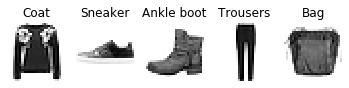

In [44]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(class_names[predict[pick[i]]])
    plt.axis("off")